### Sample code for Principal Component Analysis (PCA)  

#### Import libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

#### Parameters  

In [2]:
csv_in = 'dm-end2-2.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [3]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(301, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      301 non-null    float64
 1   sex      301 non-null    float64
 2   bmi      301 non-null    float64
 3   bp       301 non-null    float64
 4   s1       301 non-null    float64
 5   s2       301 non-null    float64
 6   s3       301 non-null    float64
 7   s4       301 non-null    float64
 8   s5       301 non-null    float64
 9   s6       301 non-null    float64
 10  disease  301 non-null    float64
dtypes: float64(11)
memory usage: 26.0 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783,259.0
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494,128.0
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633,116.0
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064,196.0
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343,220.0


#### Set data  

In [4]:
dfX = df.loc[:, 'age':'s6']
print(dfX.shape)
display(dfX.head())

(301, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.041840,-0.044642,0.128521,0.063187,-0.033216,-0.032629,0.011824,-0.039493,-0.015998,-0.050783
1,-0.034575,-0.044642,-0.037463,-0.060757,0.020446,0.043466,-0.013948,-0.002592,-0.030751,-0.071494
2,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039540,0.019633
3,0.001751,0.050680,0.026128,-0.009113,0.024574,0.038456,-0.021311,0.034309,0.009436,0.003064
4,0.016281,0.050680,0.014272,0.001215,0.001183,-0.021355,-0.032356,0.034309,0.074968,0.040343


#### Standardization  

In [5]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)
print(X_std)
print(X_std.shape)

[[-0.85749477 -0.92012269  2.67812282 ... -0.83272275 -0.39675163
  -1.07732399]
 [-0.70363133 -0.92012269 -0.8025508  ... -0.0299506  -0.71180731
  -1.52645767]
 [ 0.21954933  1.08681158 -0.12449749 ...  1.5755937   0.78929032
   0.44973054]
 ...
 [ 1.29659344  1.08681158  1.59323754 ...  0.77282155  0.5841877
   0.98869096]
 [ 0.52727622 -0.92012269  0.39534337 ... -0.0299506   1.35538752
   1.0785177 ]
 [ 0.21954933 -0.92012269  0.28233449 ... -0.83272275 -0.76514419
  -1.25697746]]
(301, 10)


#### PCA  

In [6]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### PC coordinates  

In [7]:
print(X_pca.shape)
print(X_pca[:5])

(301, 7)
[[-5.48470909e-01  7.74754091e-01  1.06177423e+00  2.49038973e+00
   1.53211031e+00  1.55551307e+00 -2.94585293e-01]
 [-1.17211731e+00 -1.33406714e+00 -1.87778898e+00  1.05131390e-01
   8.18445921e-01 -3.34834875e-01 -2.17233182e-01]
 [ 2.30542914e+00 -1.00732204e+00 -2.04338965e+00 -1.03065202e+00
  -2.79133214e-01 -7.81535946e-01 -6.87427679e-02]
 [ 1.35349524e+00  3.48494265e-02 -8.00840790e-01 -5.66015247e-01
   2.91009796e-01  1.81976074e-01 -1.44389126e-01]
 [ 1.64713029e+00  1.06167644e+00  1.02233286e-03 -1.84141492e-01
  -8.04046882e-01 -5.96862144e-01  8.72894451e-01]]


#### Check contribution ratio  

In [8]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.40661797 0.15601016 0.1179804  0.08906281 0.06443856 0.0617785
 0.05172373]
[0.40661797 0.56262814 0.68060853 0.76967135 0.8341099  0.8958884
 0.94761213]


#### Draw graph of contribution  

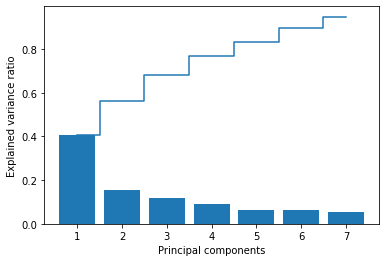

In [9]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

#### 2D plot 

In [10]:
ser_class = df['disease']
print(ser_class.value_counts())

90.0     5
142.0    4
128.0    4
96.0     4
71.0     4
178.0    4
72.0     4
144.0    4
91.0     3
200.0    3
102.0    3
275.0    3
131.0    3
64.0     3
111.0    3
220.0    3
214.0    3
141.0    3
59.0     3
310.0    3
109.0    3
77.0     3
63.0     3
151.0    3
97.0     3
202.0    3
83.0     3
258.0    3
265.0    3
60.0     3
52.0     3
150.0    3
281.0    3
129.0    3
118.0    3
51.0     2
116.0    2
259.0    2
122.0    2
182.0    2
94.0     2
115.0    2
206.0    2
104.0    2
127.0    2
292.0    2
70.0     2
81.0     2
248.0    2
85.0     2
95.0     2
163.0    2
113.0    2
246.0    2
101.0    2
263.0    2
121.0    2
49.0     2
138.0    2
237.0    2
270.0    2
65.0     2
233.0    2
170.0    2
55.0     2
172.0    2
107.0    2
230.0    2
168.0    2
134.0    2
132.0    2
197.0    2
53.0     2
93.0     2
191.0    2
135.0    2
232.0    2
277.0    2
87.0     2
283.0    2
68.0     2
42.0     2
78.0     2
217.0    2
306.0    1
346.0    1
180.0    1
147.0    1
47.0     1
120.0    1
181.0    1

In [11]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red', 'green']

[259. 128. 116. 196. 220. 292. 182. 179.  59.  71. 172. 248. 163. 171.
 166. 233.  68. 202.  90.  95.  78. 208.  96. 214.  77.  97. 232. 302.
 221. 146.  91. 101. 118. 127. 126. 184.  89. 219. 161.  64. 191.  49.
 311. 281. 217. 180.  72. 270.  70. 102. 139.  83.  74. 111.  50. 153.
 341. 107. 151. 222. 178. 173.  94. 212. 141. 144. 137. 177. 147.  86.
 131. 263. 168.  84. 244.  37. 132. 122.  63. 308.  39. 138. 150.  87.
  53. 121. 197.  65. 283. 187. 200.  31. 321.  57. 246. 142. 109. 104.
 229.  69. 293.  99.  60. 273. 140. 215. 190. 114. 185. 135. 306. 258.
 113. 115. 243. 274. 162.  67. 134.  93. 120.  81. 237. 310. 252. 235.
 155. 236.  51.  52.  48. 346. 277. 303. 152.  47. 275. 136.  55.  66.
 265. 245. 242.  92. 170. 272.  85. 230.  54.  79. 257.  42.  58. 186.
 108. 145. 175. 210.  88. 206. 192. 295. 129. 164. 195.  98. 124. 181.
 100. 209. 110. 332. 262.]


#### Draw biplot  

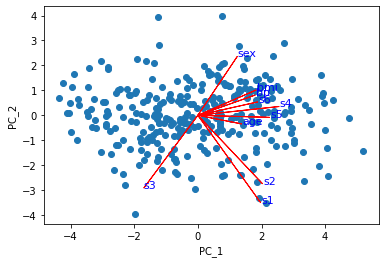

In [12]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)

##### X axis is similar to feature "Flavanoides"  
##### Y axis is similar to inverse of feature "Color_intensity"  

#### X $\sim$ Flavanoids, Y $\sim$ $-$Color_intensity    

In [13]:
plt.scatter(dfX.loc[:, 'Flavanoids'],
            -dfX.loc[:, 'Color_intensity'], c=ser_class)
plt.xlabel('Flavanoids')
plt.ylabel('-Color_intensity')
plt.show()

KeyError: 'Flavanoids'

#### Use loadings instead of PC coefficients  

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
biplot(X_pca[:, :2], loadings[:, :2].T, coef_labels=dfX.columns)